# Evolving Niches with Noise
## Publication Images - Spectra

In [2]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import pandas as pd

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -numpy
%aimport -logging
%aimport -os

import visualize.dataframe
# plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

In [3]:
directory_base = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/'
directories = ['20D17_nonoise_300x50', '20D17_g0_c012_i1_300x50',
               '20D22_g300_c012_i1_600x50', '20D23_g300_c012_i1_600x50_b25', '20D23_g300_c012_i1_600x50']
base_runs = [None, None, 104, 125, 105]
experiment_names = ['1','2','3a','3b','3c']

spectra = [pd.read_parquet(os.path.join(directory_base, d, 'encoded_spectrum.parquet')) for d in directories]

## Average of the 50 runs

The plot below shows the average spectra from all 50 runs of each simulation

In [4]:
# filename = 'spectra_1_2.svg'
# pdf_filename = 'spectra_1_2.pdf'
#
# fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10.5,6))
# for ax, experiment, spectrum in zip(axes, experiment_names[:2], spectra[:2]):
#     plt.sca(ax)
#     visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
#                                       title='Average communication spectrum over all runs, Experiment {}'.format(experiment))
#
# axes.flatten()[0].set_xlabel('')
#
# plt.savefig(filename)
# !cairosvg {filename} -o {pdf_filename}
# !pdfcrop {pdf_filename} {pdf_filename}


In [5]:
# filename = 'spectra_3_4_5.svg'
# pdf_filename = 'spectra_3_4_5.pdf'
#
# fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10.5,6))
# for ax, experiment, spectrum in zip(axes, experiment_names[2:], spectra[2:]):
#     plt.sca(ax)
#     visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
#                                       title='Average communication spectrum over all runs, Experiment {}'.format(experiment))
#
# axes.flatten()[0].set_xlabel('')
# axes.flatten()[0].set_ylabel('')
# axes.flatten()[1].set_xlabel('')
# axes.flatten()[2].set_ylabel('')
#
# plt.savefig(filename)
# !cairosvg {filename} -o {pdf_filename}
# !pdfcrop {pdf_filename} {pdf_filename}

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `spectra_all.pdf'.


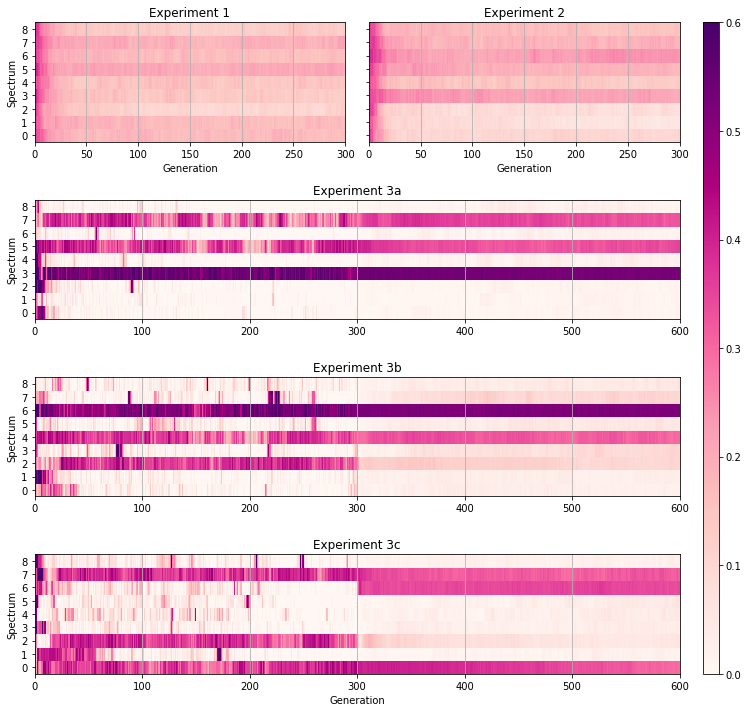

In [6]:
filename = 'spectra_all.svg'
pdf_filename = 'spectra_all.pdf'

fig = plt.figure(figsize=(10.5,10))
gs = fig.add_gridspec(4,3, width_ratios=[1,1,0.05])

axes = []
axes.append(fig.add_subplot(gs[0,0]))
axes.append(fig.add_subplot(gs[0,1], sharey=axes[0]))
axes.append(fig.add_subplot(gs[1,:2], sharey=axes[0]))
for i in range(2,4):
    axes.append(fig.add_subplot(gs[i,:2], sharex=axes[2], sharey=axes[0]))

for ax, experiment, spectrum in zip(axes, experiment_names, spectra):
    plt.sca(ax)
    if experiment == '2':
        visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
                                          colorbar=False, ylabel=None,
                                          title='Experiment {}'.format(experiment), cmap='RdPu')
    elif experiment in ['3a','3b']:
        visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
                                          colorbar=False, xlabel=None,
                                          title='Experiment {}'.format(experiment), cmap='RdPu')
    else:
        visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
                                          colorbar=False, title='Experiment {}'.format(experiment), cmap='RdPu')

plt.setp(axes[1].get_yticklabels(), visible=False)

# fig.suptitle('Communication spectrum, average over 50 runs')
cb = ScalarMappable(Normalize(vmin=0, vmax=0.6), cmap='RdPu')
fig.colorbar(cb, cax=fig.add_subplot(gs[:,2]), orientation='vertical', fraction=.05)
fig.tight_layout()#rect=[0, 0.03, 1, 0.95])

plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}